<a href="https://colab.research.google.com/github/HOSSENkhodadadi/Data_Science_Labs_Process_Methods/blob/main/Exercises/3c_Scikitlearn_Linear_Regression_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# These are raw codes just to remember do not execute dude
'''
# intercept can be calculated by fit_intercept = True
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept = True)
reg.fit(X_train, y_train)
y_test_pred = reg.predict(X_test)

# evaluating regression with metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)

from sklearn.model_selection import cross_val_score
reg = LinearRegression()
r2 = cross_val_score(reg, X, y, cv = 5, scoring = 'r2')
'''

In [5]:
%matplotlib inline
# draw the plots immediately after this cell
import matplotlib.pyplot as plt
import numpy as np

# 1. Simple linear regression
## 1.1 Generating a dataset

In [6]:
# Make dataset
x_train = 10*np.random.rand(100)         # 100 data points in [0, 10]
x_test =  10*np.random.rand(100)

noise = np.random.normal(0,1, 100)       # gaussian data, mean=0, std=1
y_train = (2*x_train + 8) + noise        # target is a linear function of the input with some noise
y_test = (2*x_test + 8) + noise  # this is hidden from the model

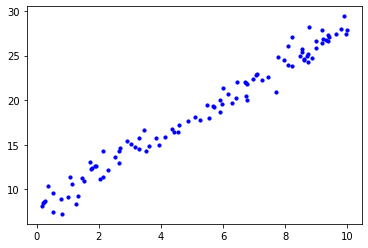

In [7]:
# Plots
fig, ax = plt.subplots()
ax.scatter(x_train, y_train, s=10, c='blue')

## 1.2 Training and fitting a regression model

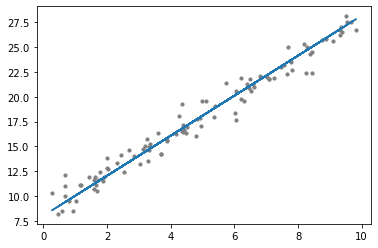

In [8]:

from sklearn.linear_model import LinearRegression

# Instantiate and train regressor `reg`
reg = LinearRegression()
reg.fit(x_train.reshape(-1,1), y_train)

# Predict for 50 equally spaced values in [0, 10]
# Use the regressor to predict the y for x_test
y_pred= reg.predict(x_test.reshape(-1,1))

# Plots
fig, ax = plt.subplots()
ax.scatter(x_test, y_test, s=10, c='grey') # display points
ax.plot(x_test, y_pred) # display linear model
plt.show()

In [9]:
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [11]:
x = np.array([0,1,2,3])
x [:,np.newaxis]

array([[0],
       [1],
       [2],
       [3]])

## 1.3 Evaluating regression

Use cross-validation with k=3 folds to evaluate a linear regressor.

Evaluate the results with R2 score, mean absolute error and mean squared error.

Use both `cross_val_score` and `cross_val_predict`

In [2]:

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

reg = LinearRegression()
# cross-validate `reg` using (x_train, y_train) 
# and 3-fold cross-validation. 
# Use the following metrics:
# r2, mae, mse (mae and mse should)
reg.fit(x_train, y_train)
r2_score(y_test, reg.predict(x_test)), mean_squared_error(y_test, reg.predict(x_test)), mean_absolute_error(y_test, reg.predict(x_test))




NameError: ignored

In [ ]:
cross_val_score(reg, x_train, y_train, cv = 5, scoring = "r2")
cross_val_score(reg, x_train, y_train, cv = 5, scoring = "r2").mean()


0.967570587081644

In [ ]:
 y_prediction= cross_val_predict(reg, x_train, y_train, cv = 5)
 r2_score(y_train, y_prediction)

0.9711500196546933

In [ ]:
reg.fit(x_train, y_train)
r2_score(y_train, reg.predict(x_train))

0.9721875829121682

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(10)
reg.fit(poly.fit_transform(x_train), y_train)
r2_score(y_train, reg.predict(poly.transform(x_train)))

0.9758777123653638

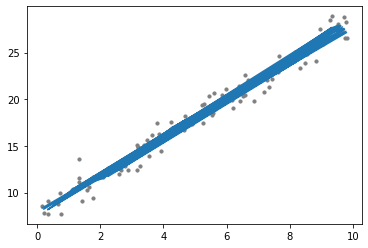

In [ ]:
# they should be sorted???
# we should sort x_train first to get a meaningful polynomial
%matplotlib inline
plt.scatter(x_train, y_train, s = 10, c = 'grey')
plt.plot(x_train,reg.predict(poly.transform(x_train)))

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# Make dataset
x_train = 10*np.random.rand(100)         # 100 data points in [0, 10]

noise = np.random.normal(0,1, 100)       # gaussian data, mean=0, std=1
y_train = (2*x_train + 8) + noise        # target is a linear function of the input with some noise


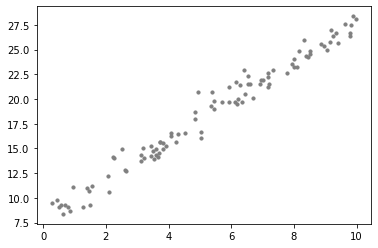

In [4]:
# Plots
plt.scatter(x_train, y_train, s=10, c='grey')
plt.show()

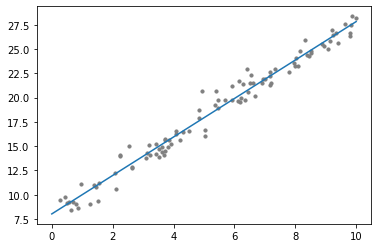

In [6]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train[:, np.newaxis], y_train)
x_test = np.linspace(0, 10, 50)
y_test = reg.predict(x_test[:, np.newaxis])

plt.scatter(x_train, y_train, s = 10, c ="gray")
plt.plot(x_test, y_test)
plt.show()

In [10]:
from sklearn.model_selection import cross_val_score 
reg = LinearRegression()
r2 = cross_val_score(reg, x_train[: , np.newaxis], y_train, cv = 5, scoring = 'r2')
mae = -cross_val_score(reg, x_train[: , np.newaxis], y_train, cv = 5, scoring = 'neg_mean_absolute_error')
mean_squared_error = -cross_val_score(reg, x_train[: , np.newaxis], y_train, cv = 5, scoring = 'neg_mean_squared_error')



In [14]:
print(f"Varience(y_train) = {y_train.var()}")
print(f"Std(y_train) = {y_train.std()}")
print(f"y_train ranges approximately in {y_train.mean():.2f} +- {y_train.std()*2:.2f}")

print( "\nAveraged cross_validation scores:")
print(f"MSE = {mse.mean():.2f}, MAE = {mae.mean():.2f}")
print(f"R2 = 1- MSE/var = {r2.mean():.2f}")


Varience(y_train) = 30.880427805337273
Std(y_train) = 5.557016088274108
y_train ranges approximately in 18.52 +- 11.11

Averaged cross_validation scores:
MSE = 0.82, MAE = 0.71
R2 = 1- MSE/var = 0.97


In [15]:
what about cross val predict

SyntaxError: ignored

# 2. Linear regression with multiple input features

## 2.1 Generating a dataset

In [16]:
# Make dataset
X_train = 10*np.random.rand(1000, 2)    # 1000 data points, 2 features (x0, x1) in the range [0, 10]

noise = np.random.normal(0,2, 1000)     # 1000 points from gaussian, mean=0, std=2
y_train = (-2*X_train[:,0] + 3*X_train[:,1]  - 4) + noise

In [52]:
%matplotlib notebook
# %matplotlib inline
# this is a solution on how make interactive plots in colab
# https://stackoverflow.com/questions/52859983/interactive-matplotlib-figures-in-google-colab



In [51]:
# Plots
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, s=10, c=y_train)
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('y')
plt.show()

<IPython.core.display.Javascript object>

## 2.2 Training and fitting a regression model

Text(0.5, 0, 'y')

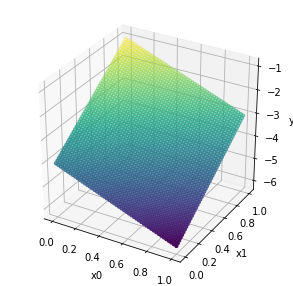

In [43]:
# Train regression
reg = LinearRegression()
reg.fit(X_train, y_train)

# Make a grid of 50 equally spaced values
values = np.linspace(0,1,50)
X_test = np.array([[x0, x1] for x0 in values for x1 in values])
# Predict values on the grid
y_test = reg.predict(X_test)

# Plot
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:,0], X_test[:,1], y_test, s=10, c=y_test)
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('y')

## 2.3 Display the coefficients and the bias (intercept) terms learned by the regressor

In [44]:
reg.coef_

array([-1.99894183,  3.00725762])

In [45]:
reg.intercept_

-4.044410223376479